In [7]:
import pandas as pd
import numpy as np
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import HTML
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import copy
import json
import csv
import ast
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

get_ipython().magic(u'matplotlib inline')

In [2]:
with open("userconfig.json", 'r') as file_obj:
    config = json.load(file_obj)
#     file_obj.close()
filedir = config["configdir"]
surveydir = config["surveydir"]

# Load the json file that has the data loading and cleaning info in it. 
# this is currently v1 and that can change if we make tweaks to things 
# like the cutoff for non-response
with open(filedir + "dataconfig.json", 'r') as file_obj:
    dataconfig = json.load(file_obj)
#     file_obj.close()

In [3]:
scaled_surveys = {}
for i in ['uw_baseline1', 'uw_baseline2', 'uw_mid', 'uw_post', 'uw_discrimination', 'cmuII_baseline1', 'cmuII_baseline2', 'cmuII_post']:
    scaled_surveys[i] = pd.read_csv(surveydir + i + "_with_scale.csv")
    scaled_surveys[i].set_index("PID",inplace = True)
    scaled_surveys[i]["PID"] = scaled_surveys[i].index

In [4]:
names = ["BRS", "PSQI", "CSU_Substance", "CES_D", "PSS", "CHIPS", "UCLA_Loneliness", "RQ", "STAI", "SF_12",
        "ISEL_APPRAISEL", "ISEL_BELONGING", "ISEL_TANGIBLE", "MAAS", "GMM",
        "K2way_SSS_REmotional", "K2way_SSS_GEmotional", "K2way_SSS_RInstrumental", "K2way_SSS_GInstrumental",
        "K2way_SSS_Receive", "K2way_SSS_Give", "RSQ"]

BRS
Ttest_relResult(statistic=1.7014107728259875, pvalue=0.09065207971357939)
PSQI
Ttest_relResult(statistic=-1.4934050490142146, pvalue=0.13714229597600402)
CSU_Substance
Ttest_relResult(statistic=0.3770369514319493, pvalue=0.7066055746656124)
CES_D
Ttest_relResult(statistic=-3.536491082235208, pvalue=0.0005197960760959078)
PSS
Ttest_relResult(statistic=-2.396268968167509, pvalue=0.0176231686908538)
CHIPS
Ttest_relResult(statistic=0.2716856267584322, pvalue=0.7861858354098581)
UCLA_Loneliness
Ttest_relResult(statistic=2.1088460539934717, pvalue=0.036389145011835974)
RQ
Fail
STAI
Ttest_relResult(statistic=-1.8543108997760447, pvalue=0.06538717112961334)
SF_12
Ttest_relResult(statistic=3.2036660726379846, pvalue=0.0016140072844769754)
ISEL_APPRAISEL
Ttest_relResult(statistic=-0.6226527808146043, pvalue=0.5343278852495059)
ISEL_BELONGING
Ttest_relResult(statistic=0.8881795466219025, pvalue=0.3756703093335392)
ISEL_TANGIBLE
Ttest_relResult(statistic=1.206452929000111, pvalue=0.22928065614

c:\programpool\anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


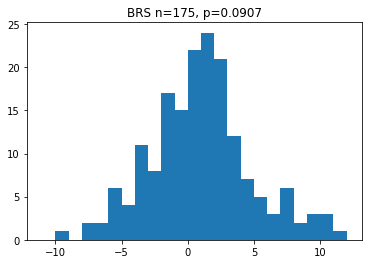

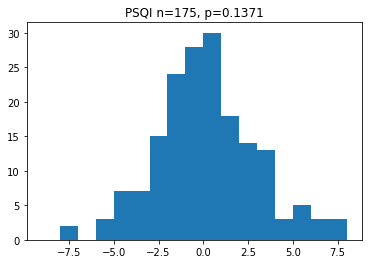

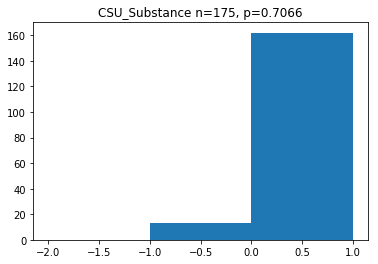

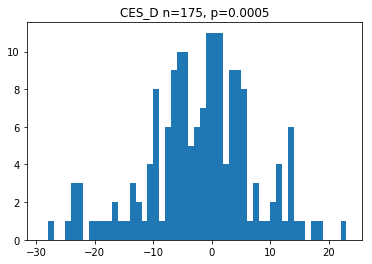

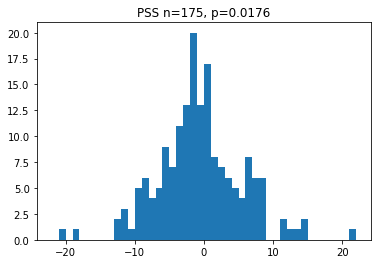

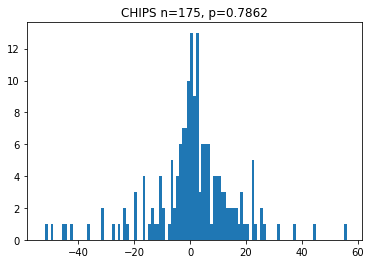

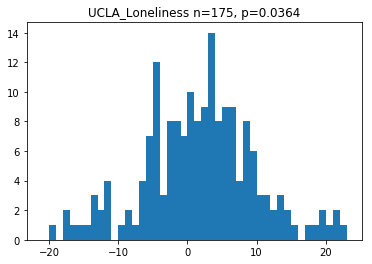

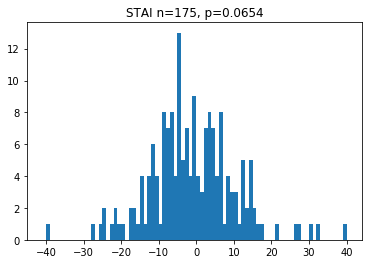

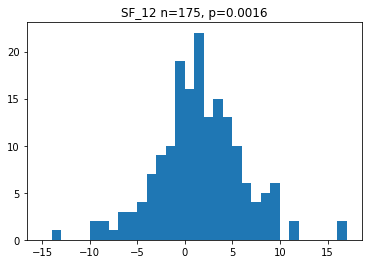

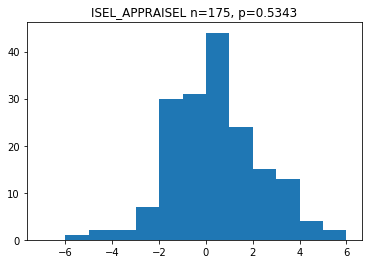

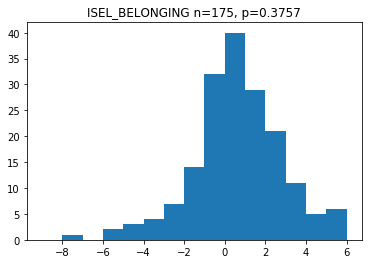

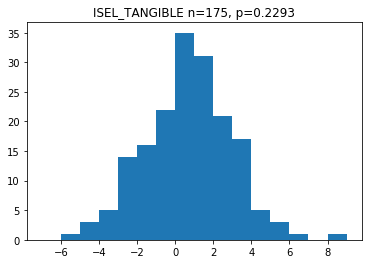

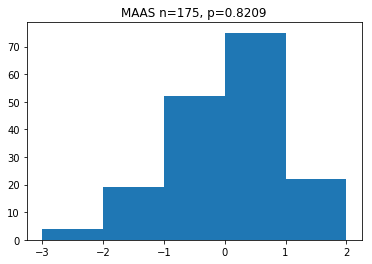

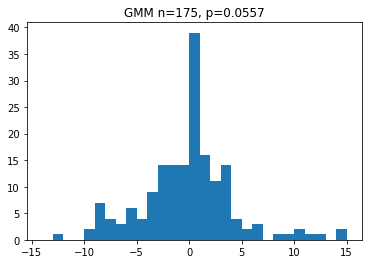

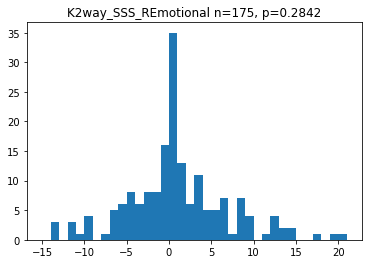

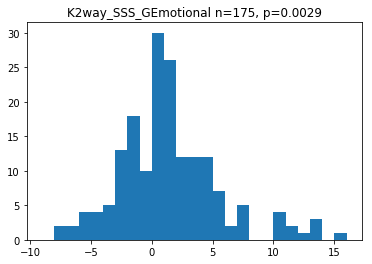

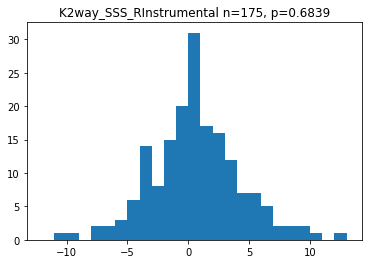

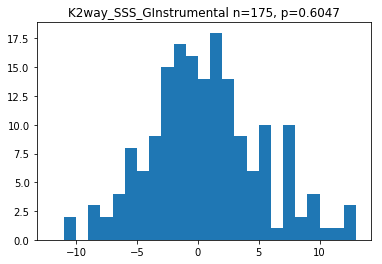

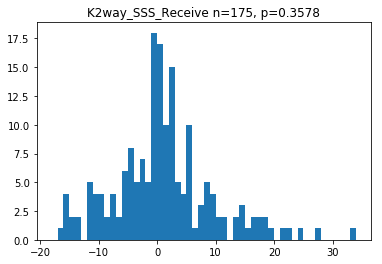

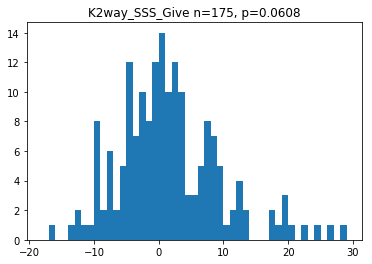

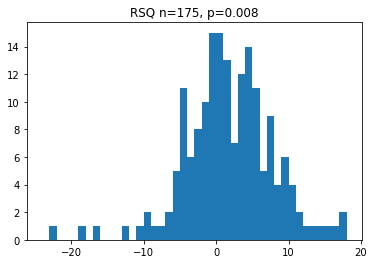

In [9]:
for name in names:
    print(name)
    try:

        a = scaled_surveys["uw_baseline2"][["PID",name]].merge(scaled_surveys["uw_post"][["PID",name]], how = "inner", on = "PID")
        cols = [name + "_x", name + "_y"]

        flag = (~(a[cols[0]] + a[cols[1]]).isna()) & ((np.abs(a[cols[0]]) < 200) & (np.abs(a[cols[1]]) < 200))
        #     flag = (~(a[cols[0]] + a[cols[1]]).isna())

        test = stats.ttest_rel(a[flag][cols[0]], a[flag][cols[1]])
        print(test)
    #         if (test.pvalue < 0.06):
        fig, ax = plt.subplots()
        d = a[flag][cols[0]] - a[flag][cols[1]]
        plt.hist(d,bins = range(int(min(d))-1, int(max(d)) + 1, 1))
        plt.title(name + " n=" + str(sum(flag)) + ", p=" + str(round(test.pvalue,4)))
    except:
        print("Fail")
        pass